# Homework 10
In our examples in [the visualization notebook](07-visualization.ipynb), we considered raw counts over time.

## Question 1
  - what does the line plot of year vs. number registered for the names Mary, Margaret, and Makenzie look like if we plot the proportion of names that year?
    * e.g. if there were 1000 names registered in 1950 and 100 of them were Mary, then the proportion should be 0.10
  - do the plots look different?


Here's the original plot (to view this on your computer, download `image-20230307-193605.png` from the git repo into the same directory as this notebook):

![plot](image-20230307-193605.png)

Don't forget to import the modules you need and read in the data that you need (all files are available in the `data/` folder on pCloud).

In [1]:
# TODO

## SOLUTIONS

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# First, read in the data.
names = pd.read_csv('../data/names_1880-20180304.csv.bz2').sort_values(by='yob')
names.head()

,yob,name,gender,count
24,1880,Gertrude,F,787
23,1880,Jennie,F,793
22,1880,Bessie,F,796
21,1880,Mabel,F,808
20,1880,Maude,F,858


In [18]:
names[['yob', 'count']].groupby('yob').sum()

,count
yob,
1880,201484
1881,192696
1882,221533
1883,216946
1884,243462
...,...
2013,3637310
2014,3696311
2015,3688687


In [19]:
names[['yob', 'count']].groupby('yob').sum().reset_index()

,yob,count
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462
...,...,...
133,2013,3637310
134,2014,3696311
135,2015,3688687
136,2016,3652968


In [26]:
names.groupby('yob')['count'].transform('sum')

24          201484
23          201484
22          201484
21          201484
20          201484
            ...   
1924649    3546301
1924650    3546301
1924651    3546301
1924633    3546301
1924626    3546301
Name: count, Length: 1924665, dtype: int64

In [21]:
# Next, group all of the names by year and sum over the name counts.
names_by_year = names.groupby('yob')['count'].sum().reset_index(name='total')
names_by_year

,yob,total
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462
...,...,...
133,2013,3637310
134,2014,3696311
135,2015,3688687
136,2016,3652968


In [6]:
# The following does the exact same thing as above, but is perhaps more readable:
names_by_year = names.groupby('yob', as_index=False).agg(total=('count', 'sum'))
names_by_year

,yob,total
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462
...,...,...
133,2013,3637310
134,2014,3696311
135,2015,3688687
136,2016,3652968


In [7]:
# Join (in Pandas, we say "merge") the names DataFrame and the names_by_year DataFrame using the yob column.
# In SQL, this would be something like: SELECT * FROM names JOIN names_by_year WHERE names.yob = names_by_year.yob;
names_yearly_prop = names.merge(names_by_year, on='yob')
names_yearly_prop

,yob,name,gender,count,total
0,1880,Gertrude,F,787,201484
1,1880,Jennie,F,793,201484
2,1880,Bessie,F,796,201484
3,1880,Mabel,F,808,201484
4,1880,Maude,F,858,201484
...,...,...,...,...,...
1924660,2017,Zionn,M,5,3546301
1924661,2017,Ziyang,M,5,3546301
1924662,2017,Zkari,M,5,3546301
1924663,2017,Zaviar,M,5,3546301


In [25]:
# Add a new column to hold each names proprotion realtive to all other names registered in the same year.
names_yearly_prop['prop'] = names_yearly_prop['count'] / names_yearly_prop['total']
names_yearly_prop

,yob,name,gender,count,total,prop
0,1880,Gertrude,F,787,201484,0.003906
1,1880,Jennie,F,793,201484,0.003936
2,1880,Bessie,F,796,201484,0.003951
3,1880,Mabel,F,808,201484,0.004010
4,1880,Maude,F,858,201484,0.004258
...,...,...,...,...,...,...
1924660,2017,Zionn,M,5,3546301,0.000001
1924661,2017,Ziyang,M,5,3546301,0.000001
1924662,2017,Zkari,M,5,3546301,0.000001
1924663,2017,Zaviar,M,5,3546301,0.000001


Text(0, 0.5, 'Number registered')

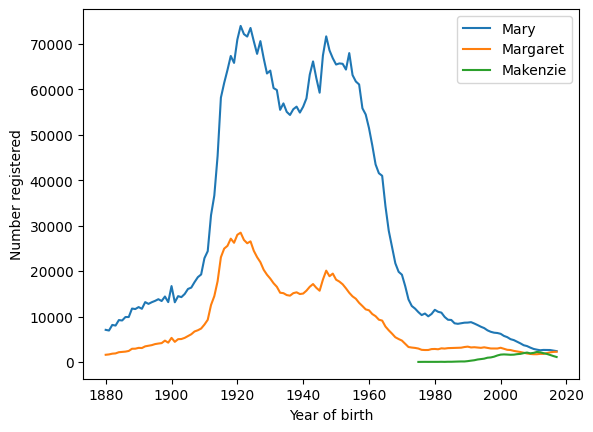

In [9]:
# Original graph (using raw frequncies).
ax = names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Mary')].plot(x='yob', y='count')
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Margaret')].plot(x='yob', y='count', ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Makenzie')].plot(x='yob', y='count', ax=ax)
plt.legend(['Mary', 'Margaret', 'Makenzie'])
plt.xlabel('Year of birth')
plt.ylabel('Number registered')

Text(0, 0.5, 'Proportion of registered that year')

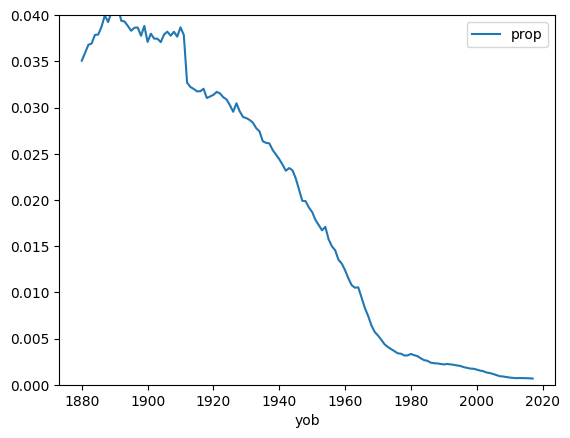

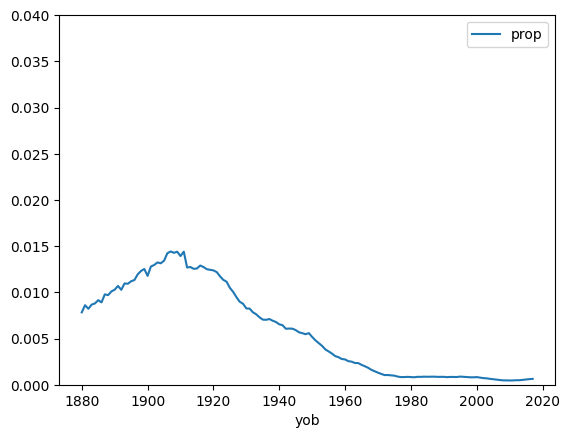

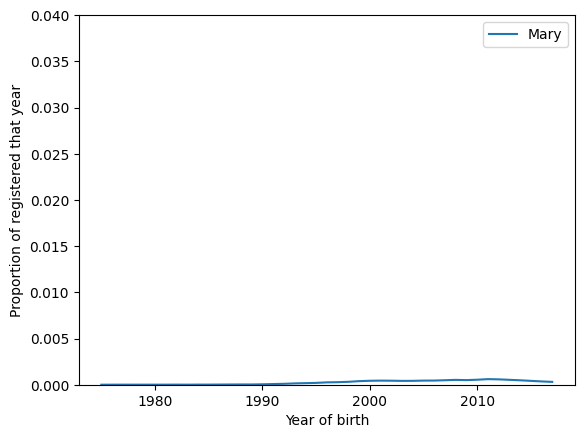

In [29]:
## By proportion -- this is the plot this question is after.
ax = names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Mary')].plot(x='yob', y='prop', ylim=(0,0.04))
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Margaret')].plot(x='yob', y='prop', ylim=(0,0.04)) #, ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Makenzie')].plot(x='yob', y='prop', ylim=(0,0.04)) #, ax=ax)
plt.legend(['Mary', 'Margaret', 'Makenzie'])
plt.xlabel('Year of birth')
plt.ylabel('Proportion of registered that year')

In [ ]:
## Load the names data (we'll use this for time series). 
## Load the names data (we'll use this for time series). 
## Load the names data (we'll use this for time series). 
## Load the names data (we'll use this for time series). 
## Load the names data (we'll use this for time series). 


## Question 1-b
  - in [the visualization notebook](07-visualization.ipynb), we considered names that I randomly picked; for this question, plot the most popular *female* name of 2017 vs. 1880 over time
  - do the same, but for *male* names

### SOLUTIONS

In [11]:
# First, let's find the most popular names in 1880:
names[names.yob == 1880].sort_values(by='count', ascending=False).head()

,yob,name,gender,count
942,1880,John,M,9655
943,1880,William,M,9532
0,1880,Mary,F,7065
944,1880,James,M,5927
945,1880,Charles,M,5348


In [12]:
# Next, the most popular names in 2017:
names[names.yob == 2017].sort_values(by='count', ascending=False).head()

,yob,name,gender,count
1892196,2017,Emma,F,19738
1910505,2017,Liam,M,18728
1892197,2017,Olivia,F,18632
1910506,2017,Noah,M,18326
1892198,2017,Ava,F,15902


Text(0, 0.5, 'Number registered')

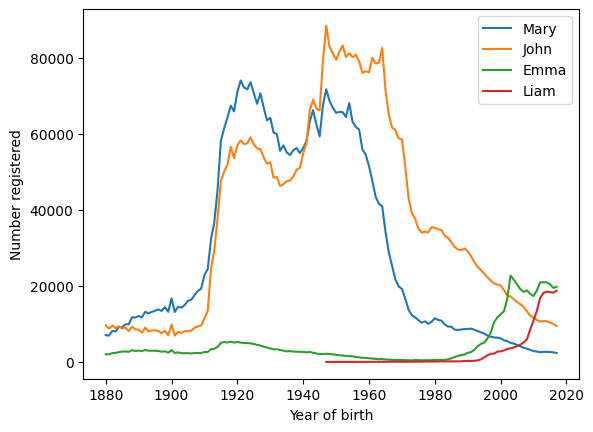

In [13]:
# Now we can plot the top male and female names from each year by raw frequency:
ax = names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Mary')].plot(x='yob', y='count')
names_yearly_prop[(names_yearly_prop.gender == 'M') & (names_yearly_prop.name == 'John')].plot(x='yob', y='count', ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Emma')].plot(x='yob', y='count', ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'M') & (names_yearly_prop.name == 'Liam')].plot(x='yob', y='count', ax=ax)
plt.legend(['Mary', 'John', 'Emma', 'Liam'])
plt.xlabel('Year of birth')
plt.ylabel('Number registered')

Text(0, 0.5, 'Proportion of registered that year')

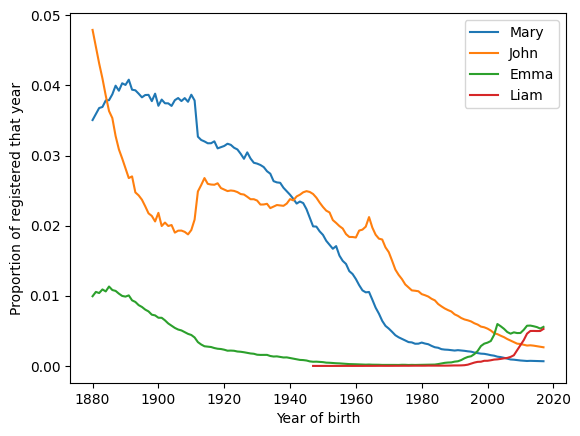

In [14]:
# And the same thing, but using proportional counts realative to the total name registered each year:
ax = names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Mary')].plot(x='yob', y='prop')
names_yearly_prop[(names_yearly_prop.gender == 'M') & (names_yearly_prop.name == 'John')].plot(x='yob', y='prop', ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'F') & (names_yearly_prop.name == 'Emma')].plot(x='yob', y='prop', ax=ax)
names_yearly_prop[(names_yearly_prop.gender == 'M') & (names_yearly_prop.name == 'Liam')].plot(x='yob', y='prop', ax=ax)
plt.legend(['Mary', 'John', 'Emma', 'Liam'])
plt.xlabel('Year of birth')
plt.ylabel('Proportion of registered that year')

**Analysis**—we se a very different relationship between Mary vs. John when proportional values are used instead of raw counts; Mary had a short increase until just before 1900, and has been steadily decreasing ever since. John had a sharp decline until 1910/1915, climbed for a bit, and then had a fairly steady decline.